In [1]:
#!pip install tpot -U > tpot.log
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [2]:
from tpot import TPOTRegressor


import numpy as np
# Check the TPOT documentation for information on the structure of config dicts

decision_tree_config_dict = {

    'sklearn.tree.DecisionTreeRegressor': {
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21)
    },


    # Preprocesssors
    'sklearn.preprocessing.Binarizer': {
        'threshold': np.arange(0.0, 1.01, 0.05)
    },

    'sklearn.cluster.FeatureAgglomeration': {
        'linkage': ['ward', 'complete', 'average'],
        'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine', 'precomputed']
    },

    'sklearn.preprocessing.Normalizer': {
        'norm': ['l1', 'l2', 'max']
    },

    'sklearn.decomposition.PCA': {
        'svd_solver': ['randomized'],
        'iterated_power': range(1, 11)
    },

    'sklearn.preprocessing.PolynomialFeatures': {
        'degree': [2],
        'include_bias': [False],
        'interaction_only': [False]
    },

    'sklearn.kernel_approximation.RBFSampler': {
        'gamma': np.arange(0.0, 1.01, 0.05)
    },

    'sklearn.preprocessing.RobustScaler': {
    },


    'tpot.builtins.ZeroCount': {
    },

    # Selectors
    'sklearn.feature_selection.SelectFwe': {
        'alpha': np.arange(0, 0.05, 0.001),
        'score_func': {
            'sklearn.feature_selection.f_classif': None
        }
    },

    'sklearn.feature_selection.SelectPercentile': {
        'percentile': range(1, 100),
        'score_func': {
            'sklearn.feature_selection.f_classif': None
        }
    },

    'sklearn.feature_selection.VarianceThreshold': {
        'threshold': np.arange(0.05, 1.01, 0.05)
    },

    'sklearn.feature_selection.SelectFromModel': {
        'threshold': np.arange(0, 1.01, 0.05),
        'estimator': {
            'sklearn.ensemble.ExtraTreesRegressor': {
                'n_estimators': [100],
                'max_features': np.arange(0.05, 1.01, 0.05)
            }
        }
    }

}



model = TPOTRegressor(generations=20, population_size=100, verbosity=2, config_dict=decision_tree_config_dict)
model.fit(X_train, y_train)


Optimization Progress:   9%|▉         | 191/2100 [00:03<00:37, 50.97pipeline/s]

Generation 1 - Current best internal CV score: 21.47049948537155


Optimization Progress:  14%|█▍        | 289/2100 [00:04<00:21, 86.01pipeline/s]

Generation 2 - Current best internal CV score: 20.943117964794137


Optimization Progress:  19%|█▊        | 393/2100 [00:06<00:34, 49.71pipeline/s]

Generation 3 - Current best internal CV score: 20.943117964794137


Optimization Progress:  23%|██▎       | 480/2100 [00:07<00:20, 79.83pipeline/s]

Generation 4 - Current best internal CV score: 20.943117964794137


Optimization Progress:  28%|██▊       | 582/2100 [00:09<00:26, 58.22pipeline/s]

Generation 5 - Current best internal CV score: 20.943117964794137


Optimization Progress:  32%|███▏      | 675/2100 [00:10<00:16, 85.76pipeline/s]

Generation 6 - Current best internal CV score: 20.943117964794137


Optimization Progress:  37%|███▋      | 771/2100 [00:12<00:25, 52.30pipeline/s]

Generation 7 - Current best internal CV score: 20.943117964794137


Optimization Progress:  41%|████      | 866/2100 [00:14<00:16, 77.10pipeline/s]

Generation 8 - Current best internal CV score: 20.943117964794137


Optimization Progress:  46%|████▌     | 962/2100 [00:16<00:31, 36.30pipeline/s]

Generation 9 - Current best internal CV score: 20.943117964794137


Optimization Progress:  50%|█████     | 1054/2100 [00:18<00:19, 55.00pipeline/s]

Generation 10 - Current best internal CV score: 20.91927825772794


Optimization Progress:  54%|█████▍    | 1144/2100 [00:20<00:32, 29.71pipeline/s]

Generation 11 - Current best internal CV score: 20.91927825772794


Optimization Progress:  59%|█████▊    | 1230/2100 [00:22<00:23, 37.38pipeline/s]

Generation 12 - Current best internal CV score: 20.91927825772794


Optimization Progress:  63%|██████▎   | 1324/2100 [00:24<00:19, 38.90pipeline/s]

Generation 13 - Current best internal CV score: 20.91927825772794


Optimization Progress:  67%|██████▋   | 1416/2100 [00:28<00:35, 19.20pipeline/s]

Generation 14 - Current best internal CV score: 20.51546238478105


Optimization Progress:  72%|███████▏  | 1506/2100 [00:29<00:13, 45.25pipeline/s]

Generation 15 - Current best internal CV score: 20.51546238478105


Optimization Progress:  76%|███████▌  | 1595/2100 [00:36<00:59,  8.52pipeline/s]

Generation 16 - Current best internal CV score: 20.51546238478105


Optimization Progress:  80%|████████  | 1680/2100 [00:38<00:20, 20.63pipeline/s]

Generation 17 - Current best internal CV score: 19.99723609114893


Optimization Progress:  84%|████████▍ | 1769/2100 [00:40<00:10, 30.53pipeline/s]

Generation 18 - Current best internal CV score: 19.99723609114893


Optimization Progress:  89%|████████▊ | 1860/2100 [00:43<00:13, 17.36pipeline/s]

Generation 19 - Current best internal CV score: 19.99723609114893


Generation 20 - Current best internal CV score: 19.99723609114893

Best pipeline: DecisionTreeRegressor(SelectPercentile(input_matrix, SelectPercentile__percentile=57), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14)


TPOTRegressor(config_dict={'sklearn.tree.DecisionTreeRegressor': {'max_depth': range(1, 11), 'min_samples_split': range(2, 21), 'min_samples_leaf': range(1, 21)}, 'sklearn.preprocessing.Binarizer': {'threshold': array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6....45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}}}},
       crossover_rate=0.1, cv=5, disable_update_check=False,
       generations=20, max_eval_time_mins=5, max_time_mins=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=100,
       population_size=100, random_state=None, scoring=None, subsample=1.0,
       verbosity=2, warm_start=False)

In [3]:
model.export('model.py')
!cat model.py

import numpy as np

from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

# NOTE: Make sure that the class is labeled 'class' in the data file
tpot_data = np.recfromcsv('PATH/TO/DATA/FILE', delimiter='COLUMN_SEPARATOR', dtype=np.float64)
features = np.delete(tpot_data.view(np.float64).reshape(tpot_data.size, -1), tpot_data.dtype.names.index('class'), axis=1)
training_features, testing_features, training_target, testing_target = \
    train_test_split(features, tpot_data['class'], random_state=42)

exported_pipeline = make_pipeline(
    SelectPercentile(score_func=f_classif, percentile=57),
    DecisionTreeRegressor(max_depth=8, min_samples_leaf=12, min_samples_split=14)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [13]:
rf.feature_importances_

array([ 0.03058672,  0.00113189,  0.00590237,  0.00085432,  0.03922225,
        0.50574433,  0.01235727,  0.05166738,  0.00562791,  0.01462345,
        0.01305542,  0.01819695,  0.30102975])

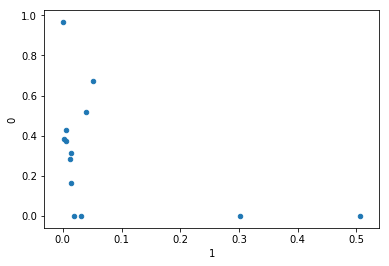

In [29]:
%matplotlib inline
import pandas as pd
from sklearn.feature_selection import SelectFwe
s = SelectFwe()
f = s.fit(X_train, rf.predict(X_train))
pd.DataFrame(list(zip(f.pvalues_, rf.feature_importances_))).plot(kind = 'scatter', x=1, y=0)

In [38]:
from skater.model import InMemoryModel
from skater import Interpretation
interpreter = Interpretation(X_train)
model = InMemoryModel(rf.predict)
imps = interpreter.feature_importance.feature_importance(model).values
pd.DataFrame(list(zip(rf.feature_importances_, imps)))

2017-07-29 20:30:04,779 - skater.model.base - WARNING - No examples provided, cannot infer model type


[13/13] features ████████████████████ Time elapsed: 0 seconds

,0,1
0,0.030587,0.001508
1,0.001132,0.004440
2,0.005902,0.018075
3,0.000854,0.018931
4,0.039222,0.027968
5,0.505744,0.034748
6,0.012357,0.036704
7,0.051667,0.037949
8,0.005628,0.058230
9,0.014623,0.079937


In [6]:
transformer = model.fitted_pipeline_.steps[0][1]

In [8]:
X_train.shape

(354, 13)

In [11]:
transformer

SelectPercentile(percentile=57,
         score_func=<function f_classif at 0x7fe4246197b8>)

In [12]:
from sklearn.feature_selection import SelectFwe
SelectFwe?

In [9]:
transformer.transform(X_train).shape

(354, 7)

In [10]:
transformer.scores_

array([ 4.16607617,  1.68383785,  1.80878418,  0.97766269,  1.96251148,
        2.21345375,  2.12660508,  1.44375876,  1.54446974,  1.93558965,
        1.41949893,  2.0595586 ,  4.81394201])

In [ ]:
feature_names = []
for t in [zip(boston.feature_names,p) for p in poly.powers_]:
    feature_name = 'x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in t if pair[1]!=0])
    feature_names.append(feature_name)